# [ICTCOG] 4기 경북대 기본반

## Numpy (6)

In [1]:
%%writefile blah.a
'''
구조가 없어 파이썬관점 blah.a는어디에서나 열리는 text file
'''
asdfasfdasdfasdf
asdf
asdf

Writing blah.a


In [2]:
with open('sun.b','wb') as f:
    f.write(b'asdfasfdasdfasdf')
    #jupyter notebook에서는 읽을수 있으나 다른곳에서는 파일 깨져서 나옴

In [3]:
with open('sun.b','r') as f:
    print(f.readlines())

['asdfasfdasdfasdf']


- file: path + name +extension

### encoding 
- 문자 -> 숫자(eg. a:97, A:65)
    - encoding방식에 따라서 파일 불러올때 주의

In [4]:
with open('sun.b') as f: 
    print(f.readlines())

['asdfasfdasdfasdf']


In [5]:
import sys

In [6]:
sys.stdin #input,output io

<_io.TextIOWrapper name='<stdin>' mode='r' encoding='UTF-8'>

### 파일 저장, 읽기
- flat file :내용 자체가 다 text로 변환(문자형으로 저장)

In [7]:
%%writefile moon.a
a=[1,2,3]
b={'x':1,'y':2}

Overwriting moon.a


In [22]:
with open('moon.a') as f:
    b=f.read()

In [23]:
b#flat file :기본적으로 text형태로 저장

''

### pickle
- 객체를 저장 가능한 형태로 바꾸어 저장

In [1]:
import pickle #객체 저장
import numpy as np

In [2]:
a=np.array([1,2,3])
b={'x':1,'y':2}

with open('moon.a','wb') as f:
    pickle.dump(a,f) #객체 저장
    pickle.dump(b,f)

In [3]:
with open('moon.a','rb') as f:
    aa=pickle.load(f) #dump한 순서대로 객체 일거옴
    bb=pickle.load(f)

In [4]:
aa

array([1, 2, 3])

In [5]:
bb

{'x': 1, 'y': 2}

## save & load
-  1개씩 저장해서 불러들임
### np.save
- array를 binary file 로 저장**npy확장자**

In [6]:
np.save
np.savetxt
np.savez
np.savez_compressed
np.load 

<function numpy.load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')>

In [7]:
np.save('aa',a) #pickle, python버전이 일치해야 불러와짐

### np.load

- npy , npz 확장자, pickeld file 열기

In [8]:
np.load('aa.npy') 

array([1, 2, 3])

In [18]:
np.save('aa',a,allow_pickle=True) #pickling하더라도 다른 방식으로 불러옴

In [10]:
np.load('aa.npy') #s

array([1, 2, 3])

In [24]:
with open('aa.npy','rb') as f:
    d=pickle.load(f) #STACK_GLOBAL

UnpicklingError: STACK_GLOBAL requires str

## savetxt & loadtxt
- 빠른 속도
- 결측치 처리 불가
### savetxt
- array 텍스트로 저장
- float dtype

In [12]:
np.savetxt('bb',a)

### np.loadtxt
- txt 파일 불러오기 

In [15]:
np.loadtxt('bb') #int -> float (18자리)

array([1., 2., 3.])

### masked array 
- 0,1로 mask 지정 가능

In [25]:
import numpy as np
import numpy.ma as ma

In [26]:
np.ma.array([1,2,3])

masked_array(data=[1, 2, 3],
             mask=False,
       fill_value=999999)

In [27]:
x=np.ma.array([1,2,3], mask=[0,1,0])
x

masked_array(data=[1, --, 3],
             mask=[False,  True, False],
       fill_value=999999)

In [28]:
x.count() #마스크 안된 데이터 2개 1,3

2

In [29]:
x=np.ma.array([1,2,1,1,3], mask=[0,1,0,1,0])
x.count()

3

In [30]:
y=np.array([1,2,1,1,1])
y.count() #일반 arary는 없음

AttributeError: 'numpy.ndarray' object has no attribute 'count'

### savez
- save zip  압축해서 묶어서 여러개 동시에 저장
#### zip
- 원소 묶어줌

In [64]:
zip([1,2,3],[4,5,6])

In [39]:
np.savez('tt',a,b) 

In [40]:
np.load('tt.npz') 

In [32]:
import csv

In [ ]:
with open ('ss.csv',encoding='cp949'  ) as f:
    t=f.readlines()

In [94]:
with open ('ss.csv',encoding='cp949'  ) as f:
    t=csv.reader(f) #csv형태로 가져옴

In [72]:
dir(t)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dialect',
 'line_num']

In [88]:
with open ('ss.csv',encoding='cp949' ) as f: #enter ,exit
    t=csv.reader(f) #csv형태로 가져옴
    for r in t:
        print(r)

['구 분', '노량진1동', '노량진2동', '상도1동', '상도2동', '상도3동', '상도4동', '흑석동', '사당1동', '사당2동', '사당3동', '사당4동', '사당5동', '대방동', '신대방1동', '신대방2동', '계']
['확 진', '26', '10', '28', '12', '15', '25', '9', '17', '19', '10', '6', '11', '22', '25', '19', '254']
['완 치', '23', '9', '27', '12', '14', '23', '8', '17', '18', '10', '6', '10', '21', '25', '17', '240']


In [90]:
np.loadtxt('ss.csv',encoding='cp949' ,skiprows=1, usecols=1)# Numpy -> homogeneous 

ValueError: could not convert string to float: '진,26,10,28,12,15,25,9,17,19,10,6,11,22,25,19,254'

## pandas
- 큰 정형 데이터 **전처리, EDA통한 분석** (Numpy기반으로 실용적으로 활용)
- 수많은 옵션, 자동 파악해서 파일 간단히 바꿈
    - 난이도 excel < pandas < SQL 
    - 속도    excel(가상 메모리) < pandas < SQL
    
> - data : row/tuple/record/ obs, columns/dimensions
> - Pandas: DataFrame, Series(한 줄), columns , index
 
compatibility
- Scikit-Learn (ML)
- statmodel /pbprohet
- TF(DL)

### 1. 불러들이기 `read_포맷`
- csv 파일의 구분자된 것을 바로 불러오기 때문에 편리함
    - encoding, sep 구분자

서울특별시 동작구_동별 코로나19 확진 및 완치 현황
: https://www.data.go.kr/data/15061742/fileData.do

In [41]:
import pandas as pd 

In [92]:
pd.read_csv('ss.csv',encoding='cp949')

,구 분,노량진1동,노량진2동,상도1동,상도2동,상도3동,상도4동,흑석동,사당1동,사당2동,사당3동,사당4동,사당5동,대방동,신대방1동,신대방2동,계
0,확 진,26,10,28,12,15,25,9,17,19,10,6,11,22,25,19,254
1,완 치,23,9,27,12,14,23,8,17,18,10,6,10,21,25,17,240


In [103]:
data=pd.read_csv('kk.csv',sep='|') #utf-8빠르게 불러들임
data

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19909700,이오쇠고기국밥,NaN,Q,음식,Q01,한식,Q01A05,해장국/감자탕,I56111,...,2711015700100120009018096,NaN,대구광역시 중구 달구벌대로 2222,700430,41951.0,NaN,NaN,NaN,128.606083,35.862251
1,19917773,대구통닭,통통치킨상인2호점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2729011500115310012015585,NaN,대구광역시 달서구 상화북로43길 74,704370,42806.0,NaN,1,NaN,128.546040,35.817554
2,19919475,빵마루,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,2726011200107610008006755,녹원아파트,대구광역시 수성구 무학로 187,706090,42183.0,NaN,1,NaN,128.628821,35.830867
3,19921253,미화,NaN,Q,음식,Q03,일식/수산물,Q03A20,복전문,I56111,...,2711010400102480020009860,NaN,대구광역시 중구 동덕로30길 57,700847,41945.0,NaN,1,2,128.606981,35.866834
4,19921284,충무회,NaN,Q,음식,Q03,일식/수산물,Q03A01,횟집,I56111,...,2726011100101540026006245,NaN,대구광역시 수성구 들안로2길 19,706801,42173.0,NaN,1,NaN,128.617649,35.831691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122966,16949310,참맛손칼국수,NaN,Q,음식,Q04,분식,Q04A02,국수/만두/칼국수,I56194,...,2729010200106300032021303,NaN,대구광역시 달서구 당산로 180,704911,42645.0,NaN,NaN,NaN,128.548971,35.852692
122967,16768250,참수산,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2726011100101900006005612,NaN,대구광역시 수성구 무학로23길 61,706801,42175.0,NaN,1,NaN,128.621832,35.832959
122968,16768220,윤카츠,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2714014500103370000003879,왕산우방타운,대구광역시 동구 파계로6길 30,701739,41005.0,NaN,NaN,NaN,128.641160,35.939131
122969,16768245,슈슈봉봉디노,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2720010200112570000000001,NaN,대구광역시 남구 용두2길 42,705833,42503.0,NaN,NaN,NaN,128.603281,35.830115


### Missing Data
- NaN
-  Missing Data
    - loadtxt 불가(빠른속도), genfromtxt , pandas 가능
    - 분석: 유의미한 결과를 얻는것

- CSV 소상공인시장진흥공단_상가(상권)정보: https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15012005

In [ ]:
pd.read_ #function (snake)- 다양한 포맷 가능

In [105]:
data['건물명'] #series

0            NaN
1            NaN
2          녹원아파트
3            NaN
4            NaN
           ...  
122966       NaN
122967       NaN
122968    왕산우방타운
122969       NaN
122970       NaN
Name: 건물명, Length: 122971, dtype: object

In [106]:
data #데이터 프레임

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19909700,이오쇠고기국밥,NaN,Q,음식,Q01,한식,Q01A05,해장국/감자탕,I56111,...,2711015700100120009018096,NaN,대구광역시 중구 달구벌대로 2222,700430,41951.0,NaN,NaN,NaN,128.606083,35.862251
1,19917773,대구통닭,통통치킨상인2호점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2729011500115310012015585,NaN,대구광역시 달서구 상화북로43길 74,704370,42806.0,NaN,1,NaN,128.546040,35.817554
2,19919475,빵마루,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,2726011200107610008006755,녹원아파트,대구광역시 수성구 무학로 187,706090,42183.0,NaN,1,NaN,128.628821,35.830867
3,19921253,미화,NaN,Q,음식,Q03,일식/수산물,Q03A20,복전문,I56111,...,2711010400102480020009860,NaN,대구광역시 중구 동덕로30길 57,700847,41945.0,NaN,1,2,128.606981,35.866834
4,19921284,충무회,NaN,Q,음식,Q03,일식/수산물,Q03A01,횟집,I56111,...,2726011100101540026006245,NaN,대구광역시 수성구 들안로2길 19,706801,42173.0,NaN,1,NaN,128.617649,35.831691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122966,16949310,참맛손칼국수,NaN,Q,음식,Q04,분식,Q04A02,국수/만두/칼국수,I56194,...,2729010200106300032021303,NaN,대구광역시 달서구 당산로 180,704911,42645.0,NaN,NaN,NaN,128.548971,35.852692
122967,16768250,참수산,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2726011100101900006005612,NaN,대구광역시 수성구 무학로23길 61,706801,42175.0,NaN,1,NaN,128.621832,35.832959
122968,16768220,윤카츠,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2714014500103370000003879,왕산우방타운,대구광역시 동구 파계로6길 30,701739,41005.0,NaN,NaN,NaN,128.641160,35.939131
122969,16768245,슈슈봉봉디노,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2720010200112570000000001,NaN,대구광역시 남구 용두2길 42,705833,42503.0,NaN,NaN,NaN,128.603281,35.830115


In [108]:
data.values #Numpy 포맷

array([[19909700, '이오쇠고기국밥', nan, ..., nan, 128.60608258558,
        35.862251083826706],
       [19917773, '대구통닭', '통통치킨상인2호점', ..., nan, 128.546039667364,
        35.8175536317154],
       [19919475, '빵마루', nan, ..., nan, 128.628821405968,
        35.830867310329],
       ...,
       [16768220, '윤카츠', nan, ..., nan, 128.6411600593, 35.9391314486083],
       [16768245, '슈슈봉봉디노', nan, ..., nan, 128.603281408033,
        35.8301149140976],
       [16768241, '하이', '롤러053', ..., nan, 128.58970147015899,
        35.8914903409157]], dtype=object)

In [109]:
data.to_numpy #내부적으로 넘파이 관리

<bound method DataFrame.to_numpy of           상가업소번호      상호명        지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0       19909700  이오쇠고기국밥        NaN         Q       음식       Q01       한식   
1       19917773     대구통닭  통통치킨상인2호점         Q       음식       Q05   닭/오리요리   
2       19919475      빵마루        NaN         Q       음식       Q08  제과제빵떡케익   
3       19921253       미화        NaN         Q       음식       Q03   일식/수산물   
4       19921284      충무회        NaN         Q       음식       Q03   일식/수산물   
...          ...      ...        ...       ...      ...       ...      ...   
122966  16949310   참맛손칼국수        NaN         Q       음식       Q04       분식   
122967  16768250      참수산        NaN         Q       음식       Q01       한식   
122968  16768220      윤카츠        NaN         Q       음식       Q01       한식   
122969  16768245   슈슈봉봉디노        NaN         Q       음식       Q01       한식   
122970  16768241       하이      롤러053         Q       음식       Q01       한식   

       상권업종소분류코드   상권업종소분류명

In [111]:
data= pd.raed_csv('kk.csv', sep='|')
data

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19909700,이오쇠고기국밥,NaN,Q,음식,Q01,한식,Q01A05,해장국/감자탕,I56111,...,2711015700100120009018096,NaN,대구광역시 중구 달구벌대로 2222,700430,41951.0,NaN,NaN,NaN,128.606083,35.862251
1,19917773,대구통닭,통통치킨상인2호점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2729011500115310012015585,NaN,대구광역시 달서구 상화북로43길 74,704370,42806.0,NaN,1,NaN,128.546040,35.817554
2,19919475,빵마루,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,2726011200107610008006755,녹원아파트,대구광역시 수성구 무학로 187,706090,42183.0,NaN,1,NaN,128.628821,35.830867
3,19921253,미화,NaN,Q,음식,Q03,일식/수산물,Q03A20,복전문,I56111,...,2711010400102480020009860,NaN,대구광역시 중구 동덕로30길 57,700847,41945.0,NaN,1,2,128.606981,35.866834
4,19921284,충무회,NaN,Q,음식,Q03,일식/수산물,Q03A01,횟집,I56111,...,2726011100101540026006245,NaN,대구광역시 수성구 들안로2길 19,706801,42173.0,NaN,1,NaN,128.617649,35.831691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122966,16949310,참맛손칼국수,NaN,Q,음식,Q04,분식,Q04A02,국수/만두/칼국수,I56194,...,2729010200106300032021303,NaN,대구광역시 달서구 당산로 180,704911,42645.0,NaN,NaN,NaN,128.548971,35.852692
122967,16768250,참수산,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2726011100101900006005612,NaN,대구광역시 수성구 무학로23길 61,706801,42175.0,NaN,1,NaN,128.621832,35.832959
122968,16768220,윤카츠,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2714014500103370000003879,왕산우방타운,대구광역시 동구 파계로6길 30,701739,41005.0,NaN,NaN,NaN,128.641160,35.939131
122969,16768245,슈슈봉봉디노,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2720010200112570000000001,NaN,대구광역시 남구 용두2길 42,705833,42503.0,NaN,NaN,NaN,128.603281,35.830115


In [113]:
x={'a':[1,2,3]}
pd.DataFrame.from_dict(x) #  class. -> class method

,a
0,1
1,2
2,3


- as 다른 특정 데이터 타입으로 변경
- 어떤 특정 데이터 타입에서 다른 파일로 변경

class :class instance해서 만들 수 있음



### 2. `.info()`
- 데이터 구성
    - 숫자가 맞지 않는 이유 : missing data
    - int 64, float 64, 
    - object : str
    - catogory:숫자로 str표현

In [104]:
data.info() #메모리 memory usage: 36.6+ MB (빠름)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122971 entries, 0 to 122970
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     122971 non-null  int64  
 1   상호명        122971 non-null  object 
 2   지점명        15495 non-null   object 
 3   상권업종대분류코드  122971 non-null  object 
 4   상권업종대분류명   122971 non-null  object 
 5   상권업종중분류코드  122971 non-null  object 
 6   상권업종중분류명   122971 non-null  object 
 7   상권업종소분류코드  122971 non-null  object 
 8   상권업종소분류명   122971 non-null  object 
 9   표준산업분류코드   115641 non-null  object 
 10  표준산업분류명    115641 non-null  object 
 11  시도코드       122971 non-null  int64  
 12  시도명        122971 non-null  object 
 13  시군구코드      122971 non-null  int64  
 14  시군구명       122971 non-null  object 
 15  행정동코드      122971 non-null  int64  
 16  행정동명       122842 non-null  object 
 17  법정동코드      122842 non-null  float64
 18  법정동명       122842 non-null  object 
 19  지번코드       122971 non-n

### haed,tail,sample
- head 데이터 상위 5개
- tail 데이터 하위 5개
- sample 데이터 1개 random sampling

In [114]:
data.head() #상위 5개(기본)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19909700,이오쇠고기국밥,NaN,Q,음식,Q01,한식,Q01A05,해장국/감자탕,I56111,...,2711015700100120009018096,NaN,대구광역시 중구 달구벌대로 2222,700430,41951.0,NaN,NaN,NaN,128.606083,35.862251
1,19917773,대구통닭,통통치킨상인2호점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2729011500115310012015585,NaN,대구광역시 달서구 상화북로43길 74,704370,42806.0,NaN,1,NaN,128.546040,35.817554
2,19919475,빵마루,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,...,2726011200107610008006755,녹원아파트,대구광역시 수성구 무학로 187,706090,42183.0,NaN,1,NaN,128.628821,35.830867
3,19921253,미화,NaN,Q,음식,Q03,일식/수산물,Q03A20,복전문,I56111,...,2711010400102480020009860,NaN,대구광역시 중구 동덕로30길 57,700847,41945.0,NaN,1,2,128.606981,35.866834
4,19921284,충무회,NaN,Q,음식,Q03,일식/수산물,Q03A01,횟집,I56111,...,2726011100101540026006245,NaN,대구광역시 수성구 들안로2길 19,706801,42173.0,NaN,1,NaN,128.617649,35.831691


In [117]:
data.tail(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
122969,16768245,슈슈봉봉디노,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2720010200112570000000001,NaN,대구광역시 남구 용두2길 42,705833,42503.0,NaN,NaN,NaN,128.603281,35.830115
122970,16768241,하이,롤러053,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2723010600103410004000002,NaN,대구광역시 북구 침산로 173,702858,41559.0,NaN,NaN,NaN,128.589701,35.891490


In [118]:
data.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
35409,21123646,새들무용가의집,NaN,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,G47416,...,2711011700100290006006906,NaN,대구광역시 중구 국채보상로 574,700060,41935.0,NaN,NaN,NaN,128.593446,35.870733


In [121]:
data.sample(frac=0.1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
41671,19923375,옛날효목떡방앗간,NaN,Q,음식,Q08,제과제빵떡케익,Q08A03,떡전문,I56191,...,2714010300101940020045592,NaN,대구광역시 동구 화랑로37길 51,701030,41175.0,NaN,NaN,NaN,128.644642,35.879311
82806,12072226,봉구네아지트,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,...,2729011500115480004015824,NaN,대구광역시 달서구 상화북로 210,704370,42813.0,NaN,3,NaN,128.548186,35.814326
116825,16467243,올포유,대구봉무점,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,G47416,...,2714010500109570000003994,NaN,대구광역시 동구 팔공로 335,701170,41019.0,NaN,3,1,128.641309,35.928793
121731,16759456,치끌림치킨,대구학정점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2723012000109430003000001,NaN,대구광역시 북구 학남로 7,702912,41416.0,NaN,NaN,NaN,128.565741,35.948803
98949,15826078,지에스로또,신월성점,D,소매,D25,기타판매업,D25A02,복권판매,R91241,...,2729012000118220000000001,NaN,대구광역시 달서구 조암로 24,704401,42752.0,NaN,1,NaN,128.527114,35.825561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85854,12276192,대박마트,NaN,D,소매,D03,종합소매점,D03A06,종합소매,G47190,...,2723011000102700008026972,NaN,대구광역시 북구 대현로 100,702821,41570.0,NaN,1,NaN,128.609801,35.882206
78274,20411038,원조할매국밥,NaN,Q,음식,Q01,한식,Q01A05,해장국/감자탕,I56111,...,2714010500115430003000001,NaN,대구광역시 동구 팔공로51길 31-8,701170,41026.0,NaN,NaN,NaN,128.637169,35.922379
12015,23437237,뉴욕스트릿,NaN,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,I56199,...,2729011100102300011003818,NaN,대구광역시 달서구 달구벌대로 1467,704130,42637.0,NaN,1,NaN,128.527416,35.849463
87448,12324424,투투,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2711015400101150030014188,동산상가의류도매부,대구광역시 중구 큰장로26길 65,700320,41926.0,NaN,3,191,128.581728,35.868969


---
대구광역시_고압가스 시설 현황 통계 (연간)
: https://www.data.go.kr/data/15010686/fileData.do

In [128]:
data =pd.read_excel('gg.xlsx') #
data

,행정구역(구군)별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6
0,행정구역(구군)별(1),합계,제조,저장,판매,일반충전,CNG충전,기타충전
1,합계,401,192,69,91,40,9,-
2,중구,30,23,2,3,2,-,-
3,동구,41,23,5,7,5,1,-
4,서구,25,8,-,12,4,1,-
5,남구,9,3,2,3,1,-,-
6,북구,60,28,3,20,7,2,-
7,수성구,29,20,3,2,3,1,-
8,달서구,96,47,20,17,10,2,-
9,달성군,111,40,34,27,8,2,-


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   행정구역(구군)별(1)  10 non-null     object
 1   2018          10 non-null     object
 2   2018.1        10 non-null     object
 3   2018.2        10 non-null     object
 4   2018.3        10 non-null     object
 5   2018.4        10 non-null     object
 6   2018.5        10 non-null     object
 7   2018.6        10 non-null     object
dtypes: object(8)
memory usage: 768.0+ bytes


- 원본 데이터와 비슷하게 맞추어줌 
    - na_values 결츨치 처리 `-` >`NaN`
    - header 설정 : multi header (2개 이상의 header)

In [154]:
data =pd.read_excel('gg.xlsx',na_values=('-'),header=[0,1]) # - >NaN
data

행정구역(구군)별(1) 2018                               
  행정구역(구군)별(1)   합계   제조    저장  판매 일반충전 CNG충전 기타충전
0           합계  401  192  69.0  91   40   9.0  NaN
1           중구   30   23   2.0   3    2   NaN  NaN
2           동구   41   23   5.0   7    5   1.0  NaN
3           서구   25    8   NaN  12    4   1.0  NaN
4           남구    9    3   2.0   3    1   NaN  NaN
5           북구   60   28   3.0  20    7   2.0  NaN
6          수성구   29   20   3.0   2    3   1.0  NaN
7          달서구   96   47  20.0  17   10   2.0  NaN
8          달성군  111   40  34.0  27    8   2.0  NaN

In [155]:
data2=data.drop(('2018','기타충전'),axis=1) #key는 문자열 str
data2

행정구역(구군)별(1) 2018                          
  행정구역(구군)별(1)   합계   제조    저장  판매 일반충전 CNG충전
0           합계  401  192  69.0  91   40   9.0
1           중구   30   23   2.0   3    2   NaN
2           동구   41   23   5.0   7    5   1.0
3           서구   25    8   NaN  12    4   1.0
4           남구    9    3   2.0   3    1   NaN
5           북구   60   28   3.0  20    7   2.0
6          수성구   29   20   3.0   2    3   1.0
7          달서구   96   47  20.0  17   10   2.0
8          달성군  111   40  34.0  27    8   2.0

In [158]:
data.drop(columns=[('2018','기타충전')]) # axis개념 포함ㅇ

행정구역(구군)별(1) 2018                          
  행정구역(구군)별(1)   합계   제조    저장  판매 일반충전 CNG충전
0           합계  401  192  69.0  91   40   9.0
1           중구   30   23   2.0   3    2   NaN
2           동구   41   23   5.0   7    5   1.0
3           서구   25    8   NaN  12    4   1.0
4           남구    9    3   2.0   3    1   NaN
5           북구   60   28   3.0  20    7   2.0
6          수성구   29   20   3.0   2    3   1.0
7          달서구   96   47  20.0  17   10   2.0
8          달성군  111   40  34.0  27    8   2.0

In [161]:
data.drop(0,axis=0) #0 번째 행 제거

행정구역(구군)별(1) 2018                              
  행정구역(구군)별(1)   합계  제조    저장  판매 일반충전 CNG충전 기타충전
1           중구   30  23   2.0   3    2   NaN  NaN
2           동구   41  23   5.0   7    5   1.0  NaN
3           서구   25   8   NaN  12    4   1.0  NaN
4           남구    9   3   2.0   3    1   NaN  NaN
5           북구   60  28   3.0  20    7   2.0  NaN
6          수성구   29  20   3.0   2    3   1.0  NaN
7          달서구   96  47  20.0  17   10   2.0  NaN
8          달성군  111  40  34.0  27    8   2.0  NaN

- inplace : return 없이 

In [165]:
data.drop(index=0,inplace=True) #axis의미 포함
data.drop([('2018','기타충전')],axis=1,inplace=True)
data.drop([('2018','합계')],axis=1, inplace=True)

행정구역(구군)별(1) 2018                              
  행정구역(구군)별(1)   합계  제조    저장  판매 일반충전 CNG충전 기타충전
1           중구   30  23   2.0   3    2   NaN  NaN
2           동구   41  23   5.0   7    5   1.0  NaN
3           서구   25   8   NaN  12    4   1.0  NaN
4           남구    9   3   2.0   3    1   NaN  NaN
5           북구   60  28   3.0  20    7   2.0  NaN
6          수성구   29  20   3.0   2    3   1.0  NaN
7          달서구   96  47  20.0  17   10   2.0  NaN
8          달성군  111  40  34.0  27    8   2.0  NaN

In [169]:
data

행정구역(구군)별(1) 2018                     
  행정구역(구군)별(1)   제조    저장  판매 일반충전 CNG충전
1           중구   23   2.0   3    2   NaN
2           동구   23   5.0   7    5   1.0
3           서구    8   NaN  12    4   1.0
4           남구    3   2.0   3    1   NaN
5           북구   28   3.0  20    7   2.0
6          수성구   20   3.0   2    3   1.0
7          달서구   47  20.0  17   10   2.0
8          달성군   40  34.0  27    8   2.0

> 오캄의 면도날(ocam's razor)
          - simple is the best
          - 불필요한 부분 제거

In [170]:
data.columns 

MultiIndex([('행정구역(구군)별(1)', '행정구역(구군)별(1)'),
            (        '2018',           '제조'),
            (        '2018',           '저장'),
            (        '2018',           '판매'),
            (        '2018',         '일반충전'),
            (        '2018',        'CNG충전')],
           )

In [171]:
data.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [172]:
data.values

array([['중구', 23, 2.0, 3, 2, nan],
       ['동구', 23, 5.0, 7, 5, 1.0],
       ['서구', 8, nan, 12, 4, 1.0],
       ['남구', 3, 2.0, 3, 1, nan],
       ['북구', 28, 3.0, 20, 7, 2.0],
       ['수성구', 20, 3.0, 2, 3, 1.0],
       ['달서구', 47, 20.0, 17, 10, 2.0],
       ['달성군', 40, 34.0, 27, 8, 2.0]], dtype=object)

- multi-indx 제거

In [186]:
data.drop(columns=data.columns[0])#열을 지워버림..

2018                     
    제조    저장  판매 일반충전 CNG충전
1   23   2.0   3    2   NaN
2   23   5.0   7    5   1.0
3    8   NaN  12    4   1.0
4    3   2.0   3    1   NaN
5   28   3.0  20    7   2.0
6   20   3.0   2    3   1.0
7   47  20.0  17   10   2.0
8   40  34.0  27    8   2.0

In [181]:
data.droplevel(0,axis=1)#멀티인덱스 제거!

,행정구역(구군)별(1),제조,저장,판매,일반충전,CNG충전
1,중구,23,2.0,3,2,NaN
2,동구,23,5.0,7,5,1.0
3,서구,8,NaN,12,4,1.0
4,남구,3,2.0,3,1,NaN
5,북구,28,3.0,20,7,2.0
6,수성구,20,3.0,2,3,1.0
7,달서구,47,20.0,17,10,2.0
8,달성군,40,34.0,27,8,2.0


In [187]:
data.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [191]:
data = data.droplevel(0,1) #재할당

In [192]:
data

,행정구역(구군)별(1),제조,저장,판매,일반충전,CNG충전
1,중구,23,2.0,3,2,NaN
2,동구,23,5.0,7,5,1.0
3,서구,8,NaN,12,4,1.0
4,남구,3,2.0,3,1,NaN
5,북구,28,3.0,20,7,2.0
6,수성구,20,3.0,2,3,1.0
7,달서구,47,20.0,17,10,2.0
8,달성군,40,34.0,27,8,2.0


In [193]:
data.drop(0,axis=0)

KeyError: '[0] not found in axis'

###  reduction operation
- 다양한 통계값을 냄.

In [194]:
data.sum()

행정구역(구군)별(1)    중구동구서구남구북구수성구달서구달성군
제조                              192
저장                               69
판매                               91
일반충전                             40
CNG충전                             9
dtype: object

In [195]:
data.sum(axis=1) #reduction

1     30.0
2     41.0
3     25.0
4      9.0
5     60.0
6     29.0
7     96.0
8    111.0
dtype: float64

- stride 때문에 axis별 계산 빠름

In [198]:
data.describe() #한번에 통계량 보여줌

,제조,저장,판매,일반충전,CNG충전
count,8.000000,7.000000,8.000000,8.000000,6.000000
mean,24.000000,9.857143,11.375000,5.000000,1.500000
std,14.716366,12.428845,9.241792,3.116775,0.547723
min,3.000000,2.000000,2.000000,1.000000,1.000000
25%,17.000000,2.500000,3.000000,2.750000,1.000000
50%,23.000000,3.000000,9.500000,4.500000,1.500000
75%,31.000000,12.500000,17.750000,7.250000,2.000000
max,47.000000,34.000000,27.000000,10.000000,2.000000


- 갯수, 평균, 표준편차, 최소 최대값, 분위별

### EDA
- 기계학습 성능을 높이기 위한 분석 EDA(Explatory Data Anaslysis,탐색적 데이터 분석)
    - 데이터에 대한 이해
    - 통계적 분석
- 기계학습 프레임워크 사용할 수 있도록 선능을 높이기 위한 전처리

<AxesSubplot:>

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_

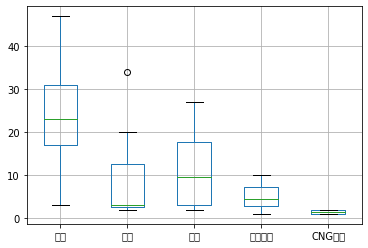

In [199]:
data.boxplot()

서로 동시에 해야해서 구분 하기 어려움

다운로드 없이 웹의 파일 처리 가능 
https://storage.googleapis.com/applied-dl/heart.csv 

In [201]:
data=pd.read_csv('https://storage.googleapis.com/applied-dl/heart.csv ')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [202]:
data.info() #결측치 없음, 문자 수치화 해야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [206]:
data.head() #head,tail,sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


##  데이터 필수 조건
- 숫자 
- 결측치(missing data) 없어야 함

### describe
- 수치데이터를 기본으로 통계값 

In [211]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [209]:
data.describe(include='all') #통계값 -데이터마다 스케일 차이 큼 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,NaN,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,NaN,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,NaN,1.000000


In [210]:
data.describe(include='object')

,thal
count,303
unique,5
top,normal
freq,168


In [208]:
data.thal.describe()

count        303
unique         5
top       normal
freq         168
Name: thal, dtype: object

<AxesSubplot:>

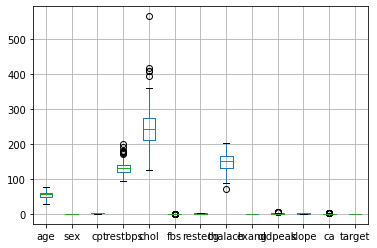

In [212]:
data.boxplot()

- outlier :원 이상치
    - 데이터 기반에서 규칠, 패턴 찾아야해서( 데이터 의존적) 결측치 처리 필요하면 함

In [217]:
data.rename({'sex':'gender'},axis=1) #drop 옵션과 비슷

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


mapper 
- map, filter , reduce
 - dictionary mapping

In [219]:
data.rename(columns={'sex':'gender'},inplace=True)

In [220]:
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [226]:
data.rename(index={4:'사'})

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
사,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [227]:
data.rename_axis#이름 바꿔야 하는경우 

<bound method NDFrame.rename_axis of      age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63       1   1       145   233    1        2      150      0      2.3   
1     67       1   4       160   286    0        2      108      1      1.5   
2     67       1   4       120   229    0        2      129      1      2.6   
3     37       1   3       130   250    0        0      187      0      3.5   
사     41       0   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   52       1   1       118   186    0        2      190      0      0.0   
299   43       0   4       132   341    1        2      136      1      3.0   
300   65       1   4       135   254    0        2      127      0      2.8   
301   48       1   4       130   256    1        2      150      1      0.0   
302   63       0   4       150   407    0        2      154      0      4.0   

     slope  ca

In [228]:
import seaborn as sns

In [230]:
tips= sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [231]:
tips.size

1708

- encoding: 문자 수치화
tidy data, 추천 시스템 만들면서

In [232]:
data.thal

0           fixed
1          normal
2      reversible
3          normal
사          normal
          ...    
298         fixed
299    reversible
300    reversible
301    reversible
302    reversible
Name: thal, Length: 303, dtype: object

In [233]:
data['thal'] #Series

0           fixed
1          normal
2      reversible
3          normal
사          normal
          ...    
298         fixed
299    reversible
300    reversible
301    reversible
302    reversible
Name: thal, Length: 303, dtype: object

In [234]:
data[['thal']] #DataFrame

,thal
0,fixed
1,normal
2,reversible
3,normal
사,normal
...,...
298,fixed
299,reversible
300,reversible
301,reversible


In [238]:
data['thal'].describe() #객체지향의 댜형성(polymorphism)

count        303
unique         5
top       normal
freq         168
Name: thal, dtype: object

### 문자열

In [239]:
data['thal'].count()

303

In [240]:
data['thal'].unique()

array(['fixed', 'normal', 'reversible', '1', '2'], dtype=object)

In [242]:
data['thal'].nunique()

5

In [ ]:
value_counts : top +freq

In [243]:
data['thal'].value_counts() #각 카테고리별 갯수

normal        168
reversible    115
fixed          18
2               1
1               1
Name: thal, dtype: int64

In [245]:
tips.info() #category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [247]:
tips.describe(include='category') #문자처럼 취급

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [250]:
tips.value_counts() #객체지향 타입에 따라서 결과가 다름

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
50.81       10.00  Male    Yes     Sat   Dinner  3       1
14.52       2.00   Female  No      Thur  Lunch   2       1
15.69       1.50   Male    Yes     Sun   Dinner  2       1
15.53       3.00   Male    Yes     Sat   Dinner  2       1
                                                        ..
20.76       2.24   Male    No      Sun   Dinner  2       1
20.69       5.00   Male    No      Sun   Dinner  5       1
            2.45   Female  No      Sat   Dinner  4       1
20.65       3.35   Male    No      Sat   Dinner  3       1
3.07        1.00   Female  Yes     Sat   Dinner  1       1
Length: 243, dtype: int64

In [249]:
tips.tip.value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
2.83     1
1.58     1
3.71     1
3.35     1
2.18     1
Name: tip, Length: 123, dtype: int64

- array programming, functional paradigm  혼용
- map, filter ,reduce 함수형 패러다임은 동시에 처리에 가장 효과적

In [251]:
data.thal.map({'normal':100, 'reversible':200, 'fixed':300, '1':1,'2':2})

0      300
1      100
2      200
3      100
사      100
      ... 
298    300
299    200
300    200
301    200
302    200
Name: thal, Length: 303, dtype: int64

In [253]:
data.thal.map(lambda x:200 if x=='normal' else 300 if x=='reversible' else 0)

0        0
1      200
2      300
3      200
사      200
      ... 
298      0
299    300
300    300
301    300
302    300
Name: thal, Length: 303, dtype: int64